# Exploratory Analysis

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
from sklearn.cluster import KMeans
import re
from wordcloud import WordCloud


# Show all columns in dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

np.seterr(invalid="ignore");

In [33]:
amenity_summed = gpd.read_file("data/amenities_grouped.csv")
amenity_point = gpd.read_file("data/amenities_phl_gdf.geojson")
amenity_neigh = gpd.read_file("data/amenities_neigh.geojson")
phl_bound = gpd.read_file("data/Yelp API/phl_bound.geojson")

In [18]:
phl_bound_proj = phl_bound.to_crs(2272)

## Philadelphia's amenity landscape

After cleaning our data from the Yelp Fusion API, we have a dataframe of 7579 total entries, with 6160 unique amenities.

In [6]:
amenity_point["name"].nunique()

6160

Below are the point locations of the amenities we pulled from the API, colored by their category.

In [12]:
amenity_point.explore(tiles='CartoDB dark_matter', legend=True, column='type', cmap='Set3')

Visualized separately, we can see distinct patterns in the locations of each type of amenity. Restaurants and beauty amenities lay in clusters spread throughout the city, while parks, arts, and nightlife are most concentrated in Center City. Historic landmarks, by contrast, are concentrated in the Old City area which houses a number of museums and historic sites such as Benjamin Franklin's grave.

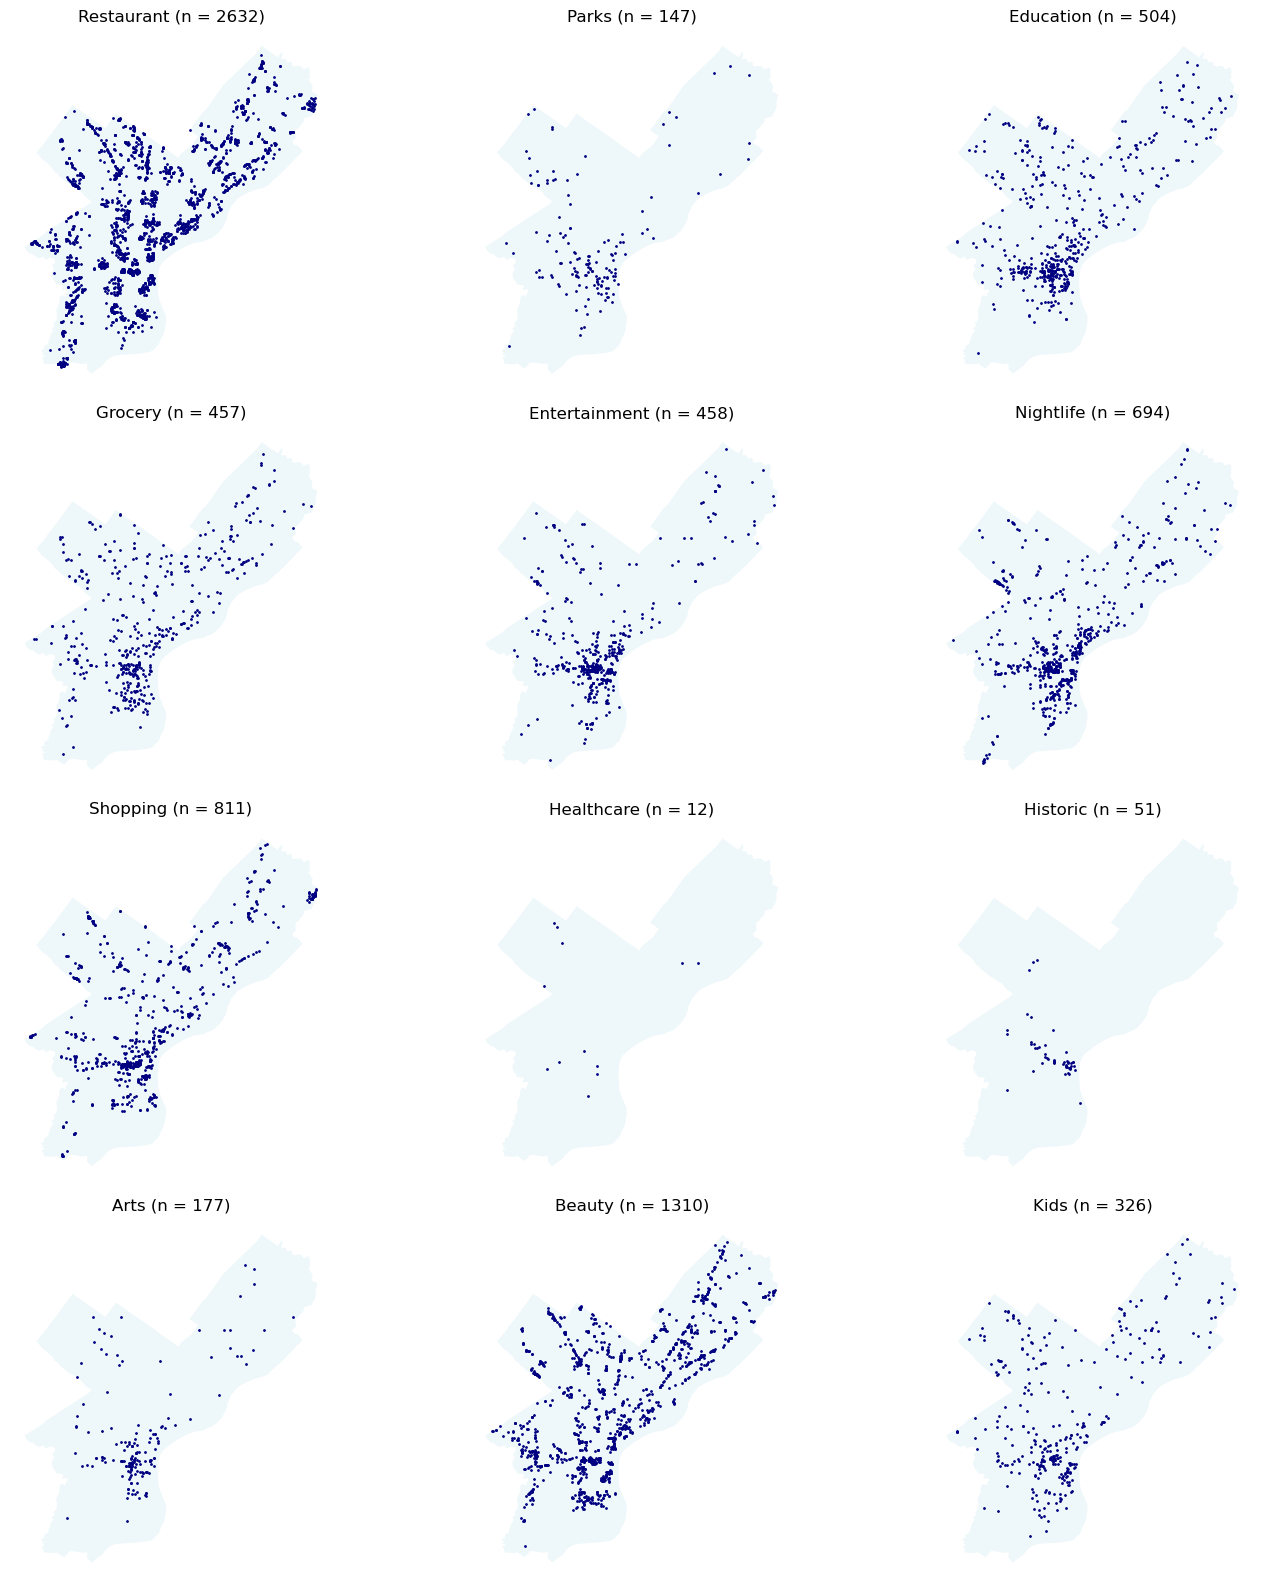

In [32]:
# Extract unique business types
business_types = amenity_point['type'].unique()

# Determine the number of rows and columns for the subplots
n_rows = len(business_types) // 3 + (len(business_types) % 3 > 0)
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))

# Flatten the axes array for easy looping
axes = axes.flatten()

# Create a map for each business type
for i, business_type in enumerate(business_types):
    # Filter data for the current business type
    subset = amenity_point[amenity_point['type'] == business_type]

    # Get count for the current business type
    count = amenity_summed[amenity_summed['type'] == business_type]['count'].values[0]
    
    # phl boundary
    phl_bound_proj.plot(ax=axes[i], color='lightblue', alpha = 0.2)
    
    # Plotting with transparency
    subset.plot(ax=axes[i], color='navy', markersize=1, alpha=1)

    # Set title with count (n = count)
    axes[i].set_title(f"{business_type.capitalize()} (n = {count})")

    # Customizations: Remove boxes, axis ticks, and labels
    axes[i].set_axis_off()

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Display the panel of maps
plt.show()

To control for neighborhoods that have higher counts of amenities in general, we also calculate the percentage share of each type of amenity in each neighborhood. This way, we can characterize the amenity profile of a neighborhood independent of the total number of amenities there. 

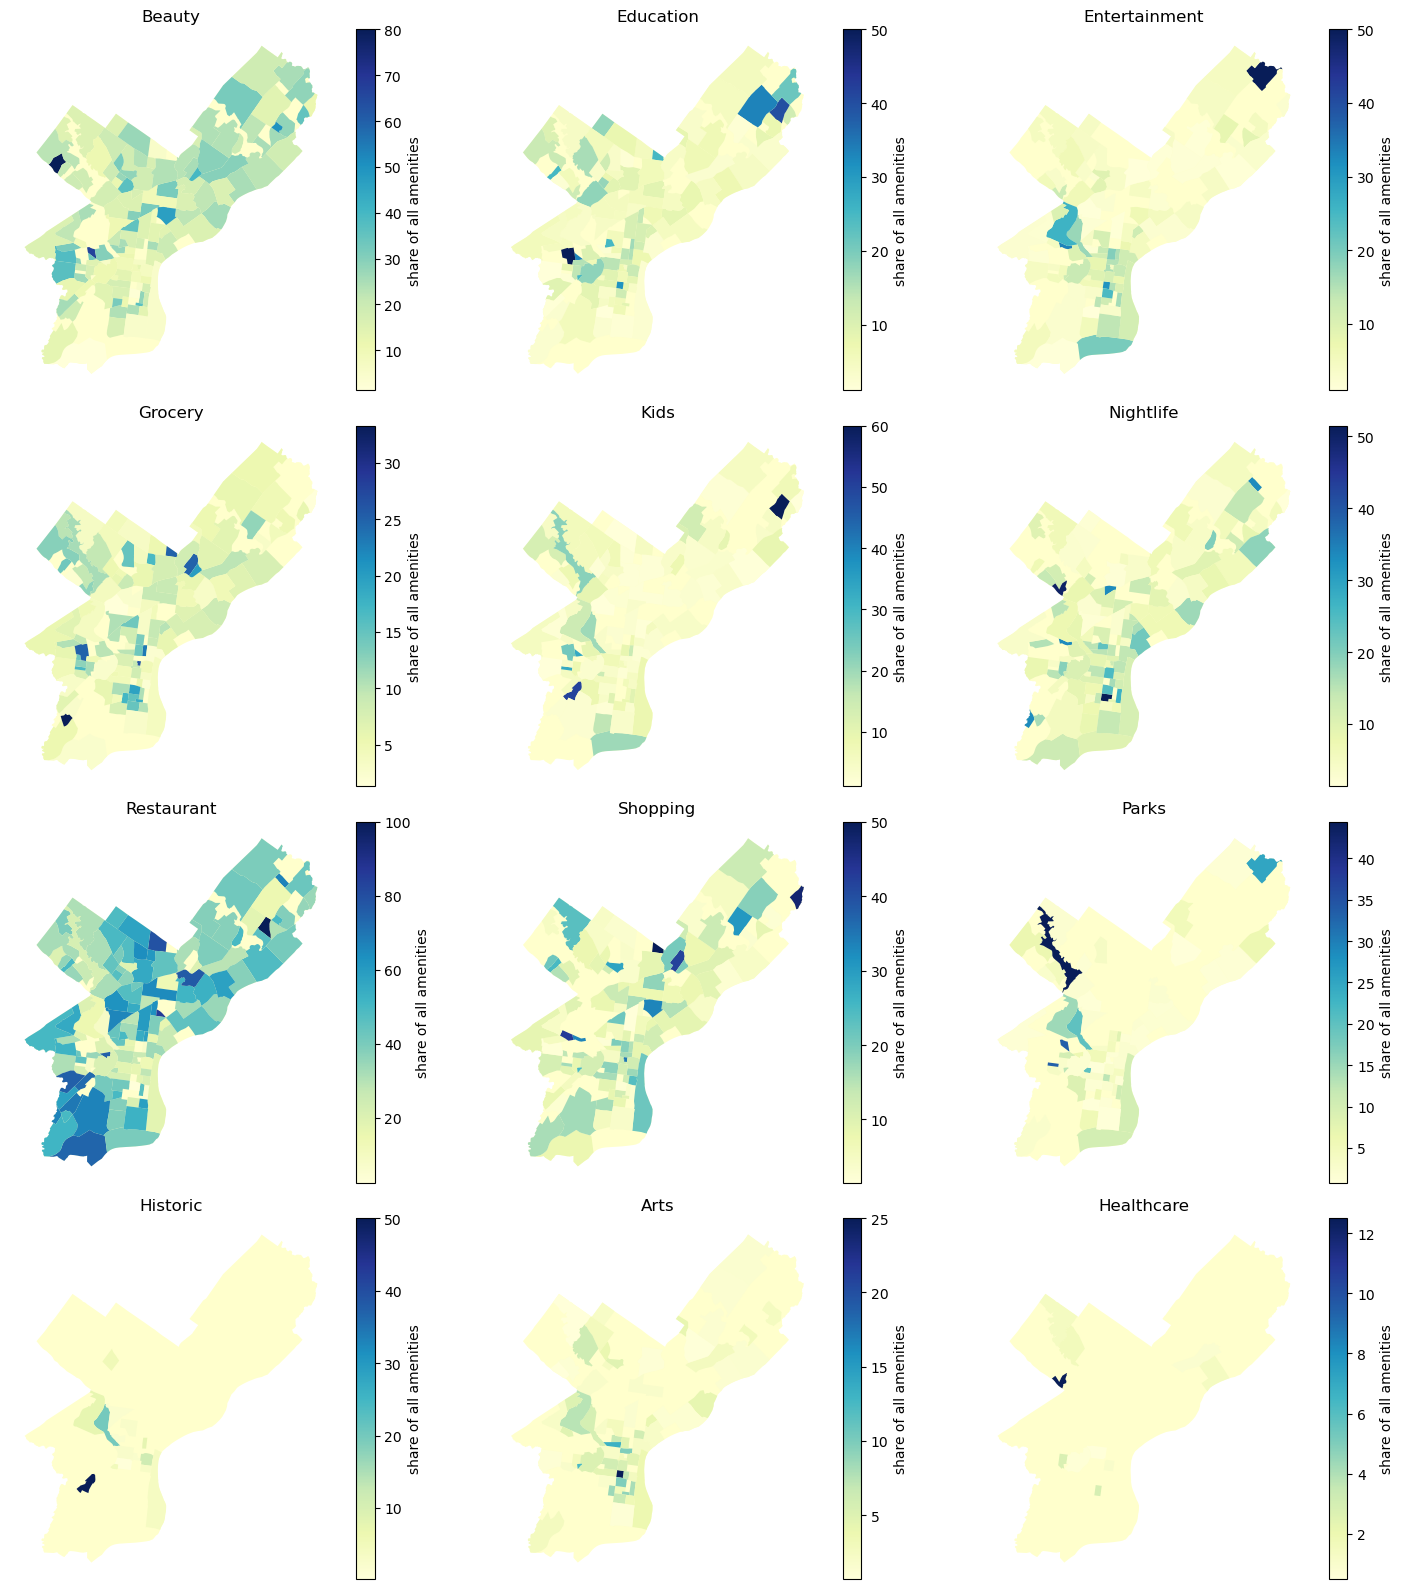

In [40]:
# Extract unique types
amenity_types = amenity_neigh['type'].unique()

# Determine the number of rows and columns for the subplots
n_rows = len(amenity_types) // 3 + (len(amenity_types) % 3 > 0)
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))

# Flatten the axes array for easy looping
axes = axes.flatten()

# Create a choropleth map for each amenity type
for i, amenity_type in enumerate(amenity_types):
    # Filter data for the current amenity type
    subset = amenity_neigh[amenity_neigh['type'] == amenity_type]
    
    # phl boundary
    phl_bound_proj.plot(ax=axes[i], color='yellow', alpha = 0.2)
    

    # Plotting
    subset.plot(column='pct_share', ax=axes[i], legend=True,
                legend_kwds={'label': "share of all amenities"},
                cmap='YlGnBu')

    # Set title
    axes[i].set_title(amenity_type.capitalize())
    
     # Remove boxes, axis ticks, and axis labels
    axes[i].set_axis_off()

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Display the panel of maps
plt.show()

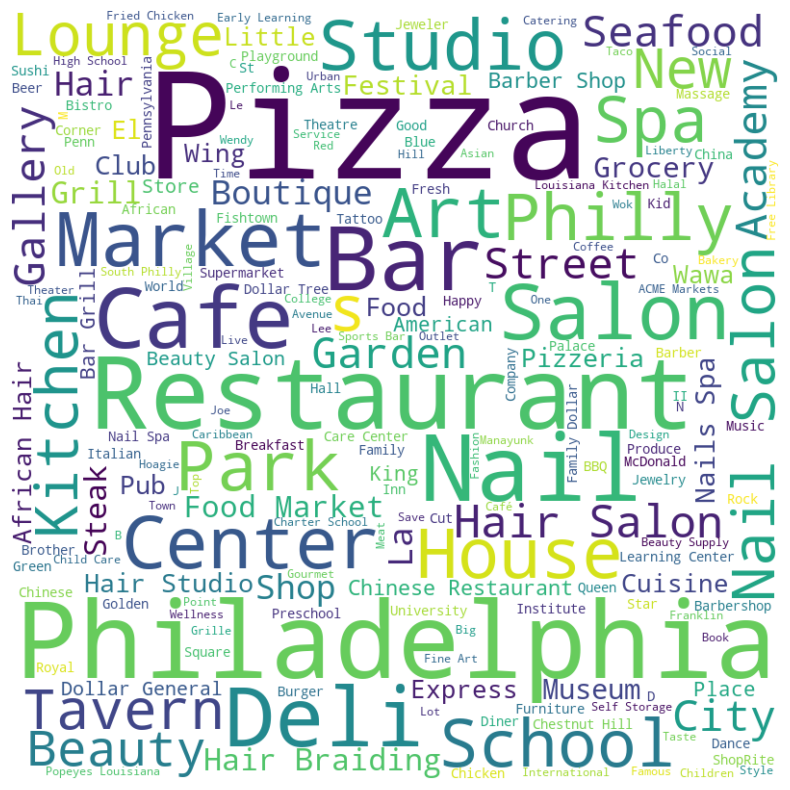

In [24]:
# Concatenate all text in the column
text = ' '.join(amenity_point["name"].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color ='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

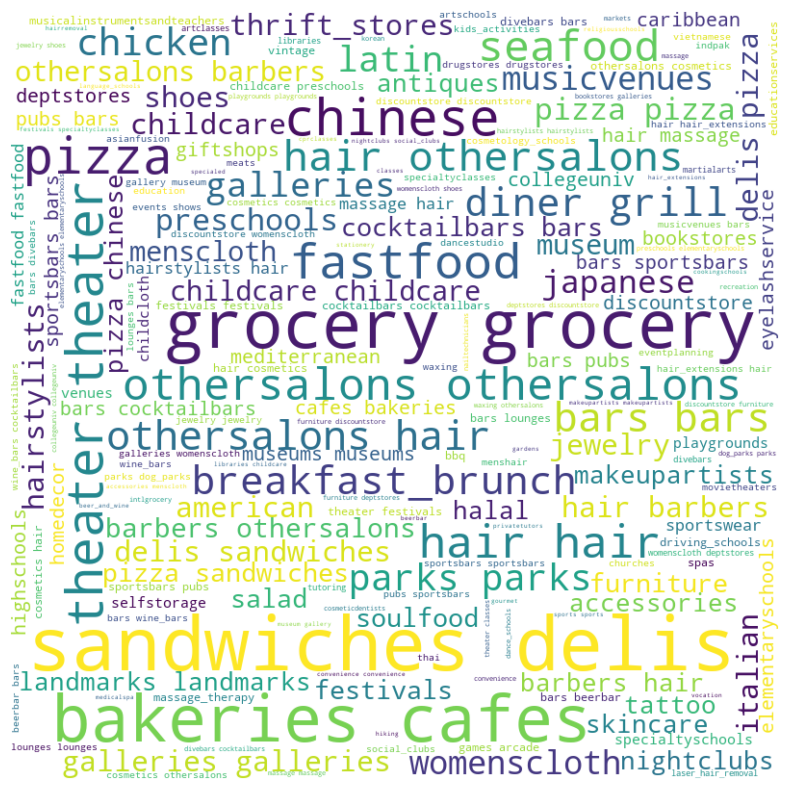

In [25]:
# Concatenate all text in the column
text = ' '.join(amenity_point["desc_1"].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color ='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()